In [109]:
#No changes to import/read in
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('student_prediction.csv')
df

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [110]:
#All your dropped values, no changes
df = df.drop("READ_FREQ_SCI", axis=1)
df = df.drop("ATTEND_DEPT", axis=1)
df = df.drop("PREP_STUDY", axis=1)
df = df.drop("LIKES_DISCUSS", axis=1)
df = df.drop("CLASSROOM", axis=1)
df = df.drop("HS_TYPE", axis=1)
df = df.drop("IMPACT", axis=1)
df = df.drop("CUML_GPA", axis=1)
df = df.drop("EXP_GPA", axis=1)
df = df.drop("ACTIVITY", axis=1)
df = df.drop("AGE", axis=1)
df = df.drop("GENDER", axis=1)
df = df.drop("SCHOLARSHIP", axis=1)
df = df.drop("WORK", axis=1)
df = df.drop("PARTNER", axis=1)
df = df.drop("SALARY", axis=1)
df = df.drop("TRANSPORT", axis=1)
df = df.drop("#_SIBLINGS", axis=1)
df = df.drop("MOTHER_EDU", axis=1)
df = df.drop("FATHER_EDU", axis=1)
df = df.drop("MOTHER_JOB", axis=1)
df = df.drop("FATHER_JOB", axis=1)
df = df.drop("COURSE ID", axis=1)
df = df.drop("LIVING", axis=1)
df = df.drop("KIDS", axis=1)
df

,STUDENTID,STUDY_HRS,READ_FREQ,ATTEND,PREP_EXAM,NOTES,LISTENS,GRADE
0,STUDENT1,3,2,1,1,3,2,1
1,STUDENT2,2,2,1,1,3,2,1
2,STUDENT3,2,1,1,1,2,2,1
3,STUDENT4,3,1,1,2,3,2,1
4,STUDENT5,2,1,1,1,2,2,1
...,...,...,...,...,...,...,...,...
140,STUDENT141,3,3,1,1,2,1,5
141,STUDENT142,3,2,2,1,3,2,5
142,STUDENT143,2,2,1,1,3,3,1
143,STUDENT144,2,2,1,1,2,1,4


In [111]:
##Create Pass/Fail, I used "3" as the split but whatever you feel works you may do
##You may also keep the "True/False" but I just did numbers here for speed on encoding later
df.loc[df['GRADE'] >3 , 'Pass/Fail'] = 1 
df.loc[df['GRADE'] <=3, 'Pass/Fail'] = 0
df

,STUDENTID,STUDY_HRS,READ_FREQ,ATTEND,PREP_EXAM,NOTES,LISTENS,GRADE,Pass/Fail
0,STUDENT1,3,2,1,1,3,2,1,0.0
1,STUDENT2,2,2,1,1,3,2,1,0.0
2,STUDENT3,2,1,1,1,2,2,1,0.0
3,STUDENT4,3,1,1,2,3,2,1,0.0
4,STUDENT5,2,1,1,1,2,2,1,0.0
...,...,...,...,...,...,...,...,...,...
140,STUDENT141,3,3,1,1,2,1,5,1.0
141,STUDENT142,3,2,2,1,3,2,5,1.0
142,STUDENT143,2,2,1,1,3,3,1,0.0
143,STUDENT144,2,2,1,1,2,1,4,1.0


In [112]:
##Wanted to see maybe if the target was very one way or another but it isn't. While it is skewed, it doesn't look too bad.
df['Pass/Fail'].value_counts()

0.0    88
1.0    57
Name: Pass/Fail, dtype: int64

In [113]:
##Convert into a numerical value as the models only like numbers, not strings
df['STUDENTID'] = pd.factorize(df['STUDENTID'])[0] + 1
df['STUDENTID']


##The more I got to thinking, the Student ID column is not necessary in this case
##So when doing the model, I dropped it here so the model doesn't think it is important.
##The indexing that is already present (when you call the df to see it,the numbers in the far left column will keep track of it)
# will make sure that nothing gets switched up 
df.drop(['STUDENTID'],axis = 1, inplace = True)
df

,STUDY_HRS,READ_FREQ,ATTEND,PREP_EXAM,NOTES,LISTENS,GRADE,Pass/Fail
0,3,2,1,1,3,2,1,0.0
1,2,2,1,1,3,2,1,0.0
2,2,1,1,1,2,2,1,0.0
3,3,1,1,2,3,2,1,0.0
4,2,1,1,1,2,2,1,0.0
...,...,...,...,...,...,...,...,...
140,3,3,1,1,2,1,5,1.0
141,3,2,2,1,3,2,5,1.0
142,2,2,1,1,3,3,1,0.0
143,2,2,1,1,2,1,4,1.0


<AxesSubplot:>

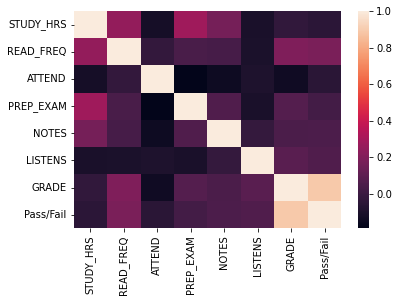

In [114]:
sns.heatmap(df.corr())

# Model with Pass/Fail as target but 'GRADE' is dropped

In [115]:
##Where there is a high correlation between grade and pass/fail, it was able to perfectly split on grade.
##Basically, while we need to test without the target variable, having "grade" within the test/train set meant the model is given the answers

In [116]:
df.drop(['GRADE'],axis = 1,inplace = True)
x = df.drop(['Pass/Fail'], axis = 1) 
y = df['Pass/Fail']

In [117]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

classifier = tree.DecisionTreeClassifier()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [118]:
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

[Text(642.2509765625, 1037.7818181818182, 'READ_FREQ <= 1.5\ngini = 0.474\nsamples = 101\nvalue = [62, 39]'),
 Text(159.84375, 938.9454545454546, 'STUDY_HRS <= 3.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(121.09375, 840.1090909090909, 'NOTES <= 2.5\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(82.34375, 741.2727272727273, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(159.84375, 741.2727272727273, 'STUDY_HRS <= 1.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(82.34375, 642.4363636363637, 'LISTENS <= 2.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(43.59375, 543.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(121.09375, 543.6, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(237.34375, 642.4363636363637, 'ATTEND <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(198.59375, 543.6, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(276.09375, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(198.59375, 840.1090909090909, 'gini = 0.0

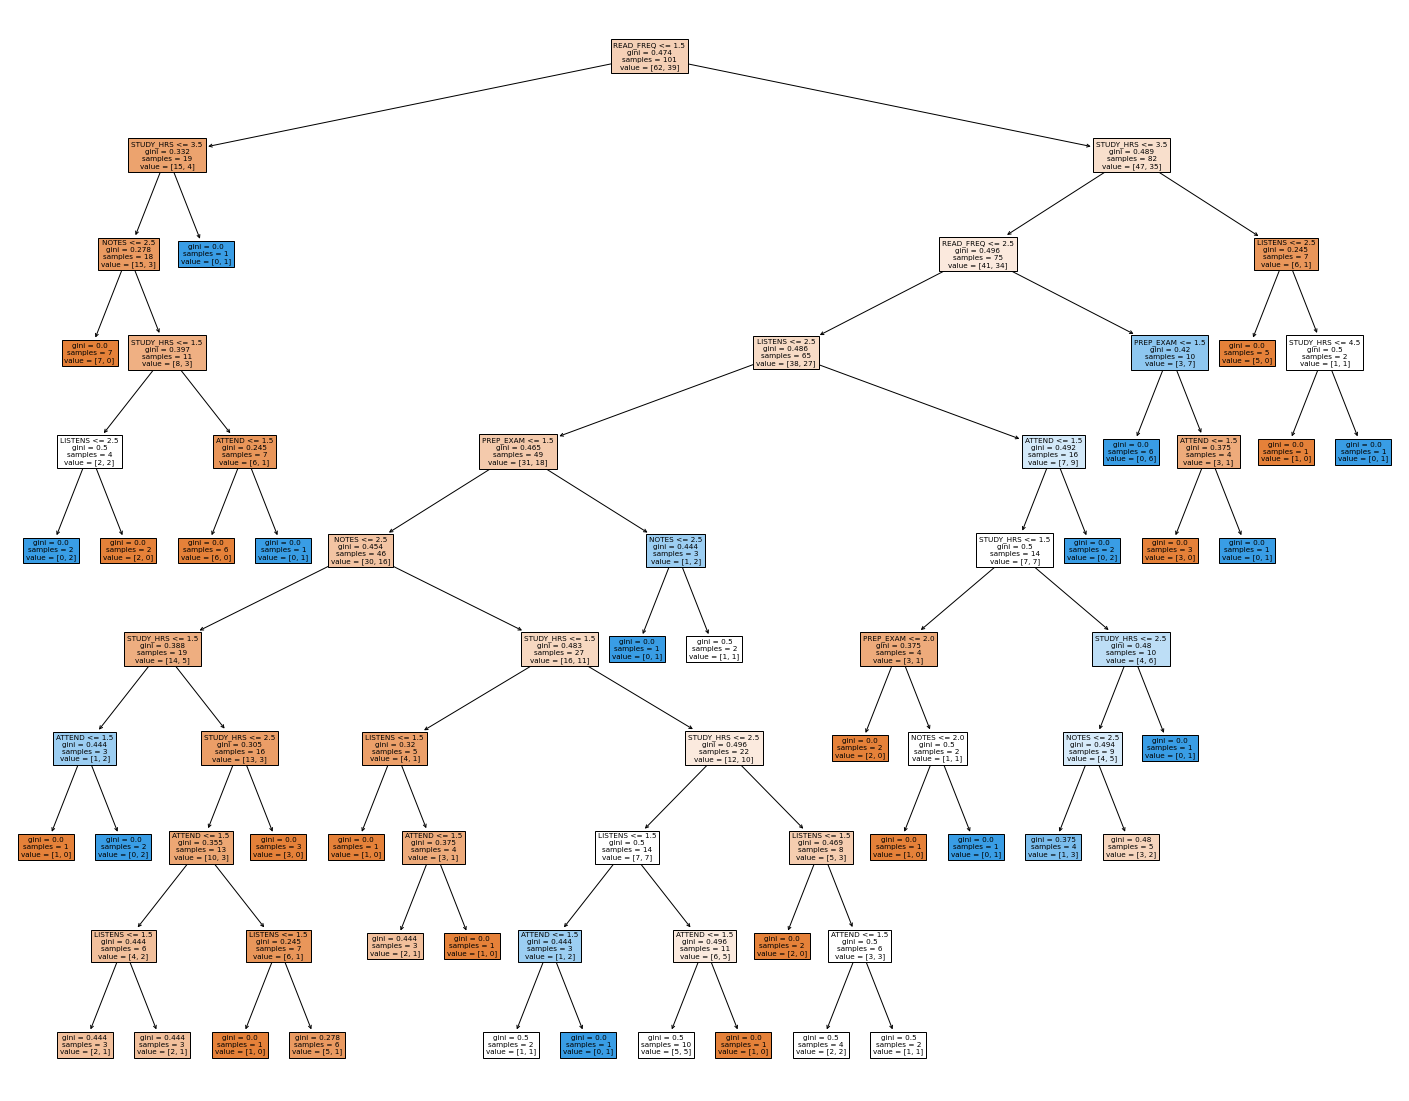

In [119]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier_1, feature_names = x.columns, filled = True)
